## Projet IA for HumanForYou

#### Groupe 5 :
- Yanis MAAFI (PM)
- Floriane Carette 
- Antoine Sire
- Frederic Nguyen 

### Définition du problème


HumanForYou est une entreprise de produits pharmaceutiques basée en Inde, qui emploie environ 4000 personnes. Cependant, chaque année, l'entreprise doit faire face à un taux de turn-over d'environ 15% de ses employés, ce qui nécessite de trouver des profils similaires sur le marché de l'emploi. La direction considère que ce niveau de turn-over a des conséquences négatives sur l'entreprise, car cela entraîne des retards dans les projets sur lesquels les employés quittant l'entreprise travaillaient, nuisant ainsi à la réputation de l'entreprise auprès de ses clients et partenaires. 

De plus, la gestion des ressources humaines devient plus complexe avec la nécessité de trouver des nouvelles recrues pour remplacer les anciennes. Enfin, le temps perdu à l'arrivée des nouveaux employés, qui doivent être formés et s'adapter à leur nouvel environnement, ralentit la productivité de l'entreprise.

![TurnOver image](https://github.com/itsyanis/Machine-Learning-Project/blob/main/Data/images/TurnOver.png)

Afin de remédier à ce problème, la direction de HumanForYou a fait appel à une équipe de spécialistes de l'analyse de données pour déterminer les facteurs ayant le plus d'influence sur le taux de turn-over. 
L'objectif est de proposer des modèles d'analyse pour identifier les pistes d'amélioration nécessaires pour inciter les employés à rester dans l'entreprise. 


### Livrable 

Pour atteindre cet objectif, plusieurs étapes seront nécessaires, notamment la collecte de données pertinentes, le prétraitement de ces données pour s'assurer de leur qualité et de leur fiabilité, la création de modèles d'analyse prédictive pour identifier les facteurs ayant le plus d'influence sur le taux de turn-over, et la mise en place de mesures pour améliorer la rétention des employés. Ces mesures peuvent inclure des changements dans les politiques de ressources humaines, des améliorations des conditions de travail, ou des mesures incitatives pour les employés.

Les démarches qui seront suivis dans ce livrable sont:

- La génération du jeux de données en justifiant les choix et les traitements effectués pour faire face aux problématiques classiques de ce type de travail.

- Le choix de (des) l'algorithme(s) d'"IA" retenu(s).

- L'analyse des résultats obtenus et leur interprétation en s'appuyant sur des métriques.

- La démarche mise en œuvre pour améliorer un modèle.

- le choix du modèle retenu au final parmi les différents essais effectués en justifiant par rapport au besoin de votre client et des métriques.

- Des propositions finales justifiées

In [46]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

### Etape 1 - Collect des données :

In [47]:
general_data = pd.read_csv("./Data/general_data.csv")
employee_survey_data = pd.read_csv('./Data/employee_survey_data.csv')
manager_survey_data = pd.read_csv('./Data/manager_survey_data.csv')

in_time_data = pd.read_csv('./Data/in_time.csv')
out_time_data = pd.read_csv('./Data/out_time.csv')

Dans un premier temps nous allons fusionner les trois premiers DataFrame qui sont : 
 - general_data
 - employee_survey_data
 - manager_survey_data

Les DataFrames <strong>"in_time_data"</strong> et <strong>"out_time_data"</strong> nécessitent une manipulation particulière avant d'etre fusionnés, nous veront ça juste apres.

Nous avons donc débuté notre processus de fusion en utilisant la fonction "merge()" de Pandas, qui nous permet de fusionner plusieurs DataFrames en utilisant la colonne <strong>EmployeeID </strong> comme clé de jointure.

In [48]:
employee_and_general_merged = employee_survey_data.merge(general_data, on='EmployeeID')
employee_and_manager_merged = employee_and_general_merged.merge(manager_survey_data, on='EmployeeID')

data_merged = employee_and_manager_merged.copy()
data_merged.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,...,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating
0,1,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,6,2,...,11,8,0,1.0,6,1,0,0,3,3
1,2,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,10,1,...,23,8,1,6.0,3,5,1,4,2,4
2,3,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,17,4,...,15,8,3,5.0,2,5,0,3,3,3
3,4,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,2,5,...,11,8,3,13.0,5,8,7,5,2,3
4,5,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,10,1,...,12,8,2,9.0,2,6,0,4,3,3


Maintenant que nous avons fusionné les trois premiers DataFrames, il est temps d'examiner de plus près les DataFrames <strong>"in_time_data"</strong> et <strong>"out_time_data"</strong> et de voir comment les fusionner avec les autres.

In [49]:
in_time_data.head(1)

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaN,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44


In [50]:
out_time_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, Unnamed: 0 to 2015-12-31
dtypes: float64(12), int64(1), object(249)
memory usage: 8.8+ MB


Les jeux de données que nous avons à disposition contiennent les heures d'arrivée et de départ des employés pour tous les jours de l'année. 

Nous avons remarqué deux choses : 
 - La présence de valeurs indefinies "NaN"
 - Les données sont au format float64(12), int64(1) et object(249)

Dans cette partie de code, nous avons commencé par remplacer toutes les valeurs (NaN) par zéro dans ces DataFrames à l'aide de la méthode fillna() de pandas.

Nous avons ensuite créé une fonction que nous avons nommé <strong>"convert_to_datetime()"</strong> qui prend un DataFrame en entrée et convertit toutes les colonnes sauf la première (qui est supposée être l'ID de l'employé "EmployeeID) en format de date et heure (DateTime).

In [51]:
data_in_time = in_time_data.fillna(0)
data_out_time= out_time_data.fillna(0)

def convert_to_datetime(dataFrame):
    for date in dataFrame.columns[1:]:
        dataFrame[date] = pd.to_datetime(dataFrame[date])
    return dataFrame

data_in_time  = convert_to_datetime(data_in_time)
data_out_time = convert_to_datetime(data_out_time)
data_in_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, Unnamed: 0 to 2015-12-31
dtypes: datetime64[ns](261), int64(1)
memory usage: 8.8 MB


Une fois que nous avons converti le type au format DateTime nous pouvant ainsi calculer le temps passé en entreprise pour chaque employé. 

Pour cela, nous avons créé un nouveau DataFrame appelé <strong>"working_time"</strong> en soustrayant les horaires d'entrée des horaires de sortie pour chaque employé 

Nous avons aussi supprimé une colonne inutile nommée "Unnamed: 0".

In [52]:
working_time = (data_out_time - data_in_time)
working_time = working_time.drop(columns=['Unnamed: 0'])
working_time.head()

,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,0 days,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,0 days,...,0 days 00:00:00,0 days 07:20:21,0 days 07:23:45,0 days 06:30:17,0 days 07:35:47,0 days,0 days 07:46:26,0 days 07:18:54,0 days 07:46:44,0 days 07:04:49
1,0 days,0 days 08:06:33,0 days 07:27:17,0 days 00:00:00,0 days 07:23:49,0 days 07:25:00,0 days 07:09:03,0 days 07:36:41,0 days 07:16:44,0 days,...,0 days 07:54:11,0 days 07:45:14,0 days 07:42:44,0 days 07:26:08,0 days 00:00:00,0 days,0 days 07:36:53,0 days 07:58:57,0 days 07:59:10,0 days 08:13:38
2,0 days,0 days 06:41:33,0 days 07:15:56,0 days 06:24:19,0 days 06:45:54,0 days 07:20:42,0 days 06:51:41,0 days 07:25:07,0 days 06:59:59,0 days,...,0 days 06:47:09,0 days 07:09:49,0 days 06:48:06,0 days 06:43:49,0 days 06:50:59,0 days,0 days 07:01:26,0 days 07:26:20,0 days 07:32:20,0 days 06:47:11
3,0 days,0 days 07:20:18,0 days 07:17:31,0 days 06:56:35,0 days 06:55:10,0 days 06:51:03,0 days 07:11:35,0 days 06:59:55,0 days 07:18:23,0 days,...,0 days 07:37:45,0 days 06:50:48,0 days 07:19:35,0 days 07:24:49,0 days 07:05:06,0 days,0 days 07:26:50,0 days 07:25:00,0 days 07:21:59,0 days 07:07:59
4,0 days,0 days 08:03:20,0 days 07:59:17,0 days 07:40:57,0 days 07:48:22,0 days 07:39:44,0 days 07:43:18,0 days 08:21:54,0 days 08:15:26,0 days,...,0 days 07:54:13,0 days 07:39:54,0 days 07:57:27,0 days 07:47:13,0 days 08:14:58,0 days,0 days 07:39:44,0 days 08:16:07,0 days 07:57:12,0 days 08:01:05


Dans le code ci-dessous, nous avons calculé la moyenne des temps de travail pour chaque employé en utilisant la méthode mean() de pandas.

In [53]:
#working_time = working_time.replace({"0 days": pd.NaT})
working_time = working_time.mask(working_time == pd.Timedelta(0), pd.NaT)
working_time_mean = working_time.mean(axis=1)
working_time_mean.head()

0   0 days 07:22:25.142241379
1   0 days 07:43:08.288135593
2   0 days 07:00:47.665289256
3   0 days 07:11:37.242553191
4   0 days 08:00:22.228571428
dtype: timedelta64[ns]

Enfin, nous avons ajouté une nouvelle colonne que nous avons appellé <strong>"WorkingTime"</strong>  a notre DataFrame data_merged, ainsi nous avons fusionner l'ensemble de nos données.

In [54]:
data_merged['WorkingTime'] = working_time_mean.dt.total_seconds() / 3600
data_merged.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,WorkingTime
0,1,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,6,2,...,8,0,1.0,6,1,0,0,3,3,7.373651
1,2,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,10,1,...,8,1,6.0,3,5,1,4,2,4,7.718969
2,3,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,17,4,...,8,3,5.0,2,5,0,3,3,3,7.013240
3,4,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,2,5,...,8,3,13.0,5,8,7,5,2,3,7.193678
4,5,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,10,1,...,8,2,9.0,2,6,0,4,3,3,8.006175


In [55]:
data_merged.shape

(4410, 30)

Text(0.5, 1.0, 'Proportion de turn-over')

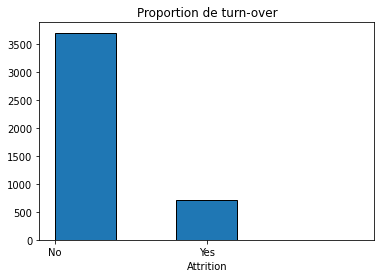

In [56]:
plt.hist(data_merged["Attrition"], range = (0, 2), bins = 5, edgecolor = 'black') 

plt.xlabel('Attrition')
plt.title("Proportion de turn-over")

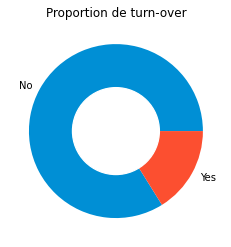

In [57]:
# Compter les valeurs uniques dans la colonne Attrition
values = data_merged['Attrition'].value_counts().sort_index().values.tolist()

labels = ['No', 'Yes']
colors = ['#008fd5', '#fc4f30']
fig, ax = plt.subplots()
ax.pie(values, labels=labels, colors=colors)
centre_circle = plt.Circle((0,0),0.5,color='white', fc='white',linewidth=1.25)
fig.gca().add_artist(centre_circle)

plt.title("Proportion de turn-over")
plt.show()


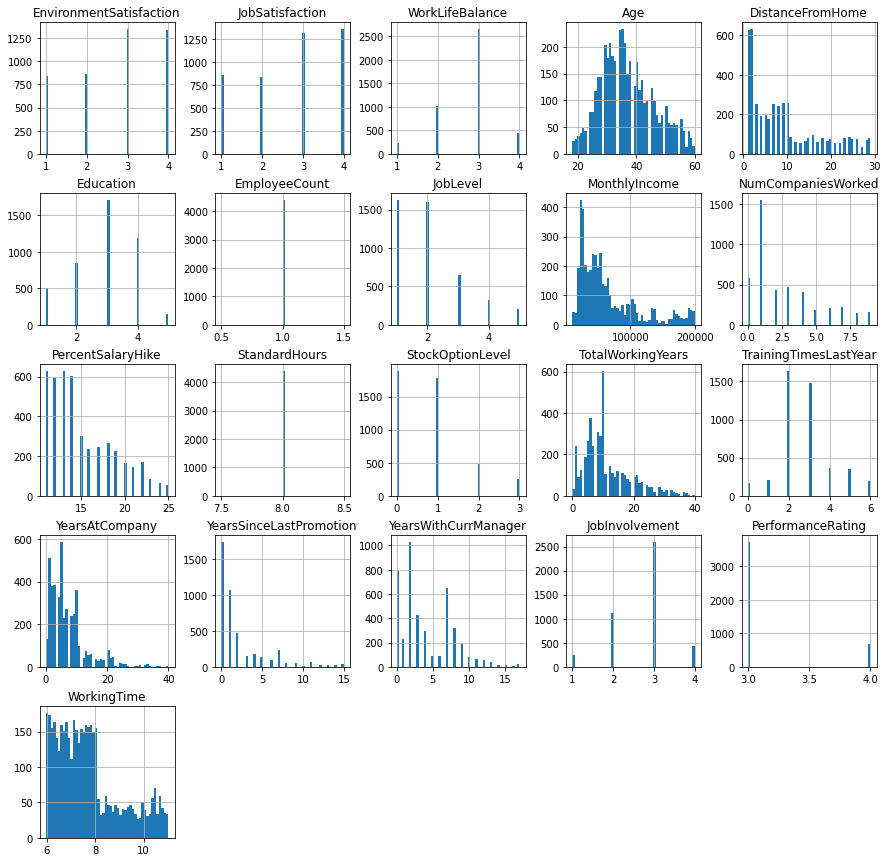

In [58]:
data_copy = data_merged.copy()
data_copy.drop("EmployeeID", axis=1, inplace=True)

data_copy.hist(bins=50, figsize=(15, 15))
plt.show()

In [59]:
# Suppression des colonne contenant des données non pertinante
def drop_irrelevant_data(dataFrame):
    deleted_columns = []
    for column in dataFrame:
        if dataFrame[column].value_counts().shape[0] == 1:
            deleted_columns.append(column)
            dataFrame.drop(column, axis=1,inplace=True)
            print(column)

drop_irrelevant_data(data_merged)

EmployeeCount
Over18
StandardHours


In [60]:
data_merged.drop(["Gender","Age"],axis=1,inplace=True)
data_merged.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,...,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,WorkingTime
0,1,3.0,4.0,2.0,No,Travel_Rarely,Sales,6,2,Life Sciences,...,11,0,1.0,6,1,0,0,3,3,7.373651
1,2,3.0,2.0,4.0,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,...,23,1,6.0,3,5,1,4,2,4,7.718969
2,3,2.0,2.0,1.0,No,Travel_Frequently,Research & Development,17,4,Other,...,15,3,5.0,2,5,0,3,3,3,7.013240
3,4,4.0,4.0,3.0,No,Non-Travel,Research & Development,2,5,Life Sciences,...,11,3,13.0,5,8,7,5,2,3,7.193678
4,5,4.0,1.0,3.0,No,Travel_Rarely,Research & Development,10,1,Medical,...,12,2,9.0,2,6,0,4,3,3,8.006175


In [61]:
qualitative_columns = data_merged.select_dtypes(include='object').columns.tolist()
print("Colonnes qualitatives : ", qualitative_columns)

Colonnes qualitatives :  ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']


In [62]:
data_merged['Attrition'].value_counts()

No     3699
Yes     711
Name: Attrition, dtype: int64

In [63]:
data_merged['Attrition'] = data_merged['Attrition'].map(lambda x: 1 if x == "Yes" else 0)
data_merged.value_counts('Attrition')

Attrition
0    3699
1     711
dtype: int64

In [67]:
corrMatrix = data_merged.corr()
corrMatrix

C:\Users\yanis\AppData\Local\Temp\ipykernel_108324\1550763545.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = data_merged.corr()


,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Attrition,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,WorkingTime
EmployeeID,1.000000,0.000798,-0.001053,-0.001723,-0.004729,-0.001097,-0.009680,-0.003303,0.007338,-0.001117,-0.004456,-0.014254,-0.001063,-0.010191,0.004086,0.000256,0.008579,0.008591,-0.006892,-0.011173
EnvironmentSatisfaction,0.000798,1.000000,-0.006550,0.024379,-0.102142,0.020183,-0.045469,-0.024448,-0.006006,0.013007,0.000841,-0.004591,-0.002265,0.018003,0.000421,0.015283,-0.005876,0.015416,0.014057,0.058827
JobSatisfaction,-0.001053,-0.006550,1.000000,-0.019104,-0.102847,-0.011144,-0.004173,-0.018279,0.005063,-0.056230,0.030808,0.039907,-0.016849,-0.021514,-0.002166,-0.016236,-0.024612,0.004058,0.043261,0.016238
WorkLifeBalance,-0.001723,0.024379,-0.019104,1.000000,-0.062756,0.008000,-0.006406,-0.027664,0.003572,-0.008714,-0.040601,-0.022886,0.001119,-0.015817,0.014704,0.009234,0.007456,-0.019424,-0.023067,-0.029738
Attrition,-0.004729,-0.102142,-0.102847,-0.062756,1.000000,-0.009730,-0.015111,-0.010290,-0.031176,0.042345,0.032533,-0.006839,-0.170338,-0.049431,-0.134392,-0.033019,-0.156199,-0.015588,0.023403,0.201688
DistanceFromHome,-0.001097,0.020183,-0.011144,0.008000,-0.009730,1.000000,-0.008638,-0.037329,-0.021607,-0.013843,0.038125,0.011169,0.009374,-0.009001,0.031684,0.002290,0.021584,-0.001837,0.036418,0.009429
Education,-0.009680,-0.045469,-0.004173,-0.006406,-0.015111,-0.008638,1.000000,0.045746,0.006410,-0.016250,-0.040531,0.001261,-0.010717,0.010472,0.006080,0.022490,0.005358,-0.018279,-0.035591,0.002229
JobLevel,-0.003303,-0.024448,-0.018279,-0.027664,-0.010290,-0.037329,0.045746,1.000000,0.047316,-0.009875,0.010973,0.000993,-0.036957,-0.032500,-0.064219,-0.060811,-0.055251,-0.012630,-0.002474,0.012559
MonthlyIncome,0.007338,-0.006006,0.005063,0.003572,-0.031176,-0.021607,0.006410,0.047316,1.000000,-0.020726,0.004325,0.026930,-0.033787,0.050112,0.000995,0.065219,0.024304,0.023346,0.016093,-0.012223
NumCompaniesWorked,-0.001117,0.013007,-0.056230,-0.008714,0.042345,-0.013843,-0.016250,-0.009875,-0.020726,1.000000,0.030860,0.017163,0.238807,-0.032286,-0.117959,-0.036656,-0.109667,0.027985,0.017819,-0.014937


In [68]:
print(corrMatrix["Attrition"].sort_values(ascending=False))

Attrition                  1.000000
WorkingTime                0.201688
NumCompaniesWorked         0.042345
PercentSalaryHike          0.032533
PerformanceRating          0.023403
EmployeeID                -0.004729
StockOptionLevel          -0.006839
DistanceFromHome          -0.009730
JobLevel                  -0.010290
Education                 -0.015111
JobInvolvement            -0.015588
MonthlyIncome             -0.031176
YearsSinceLastPromotion   -0.033019
TrainingTimesLastYear     -0.049431
WorkLifeBalance           -0.062756
EnvironmentSatisfaction   -0.102142
JobSatisfaction           -0.102847
YearsAtCompany            -0.134392
YearsWithCurrManager      -0.156199
TotalWorkingYears         -0.170338
Name: Attrition, dtype: float64


C:\Users\yanis\AppData\Local\Temp\ipykernel_108324\3658633273.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data_merged.corr()


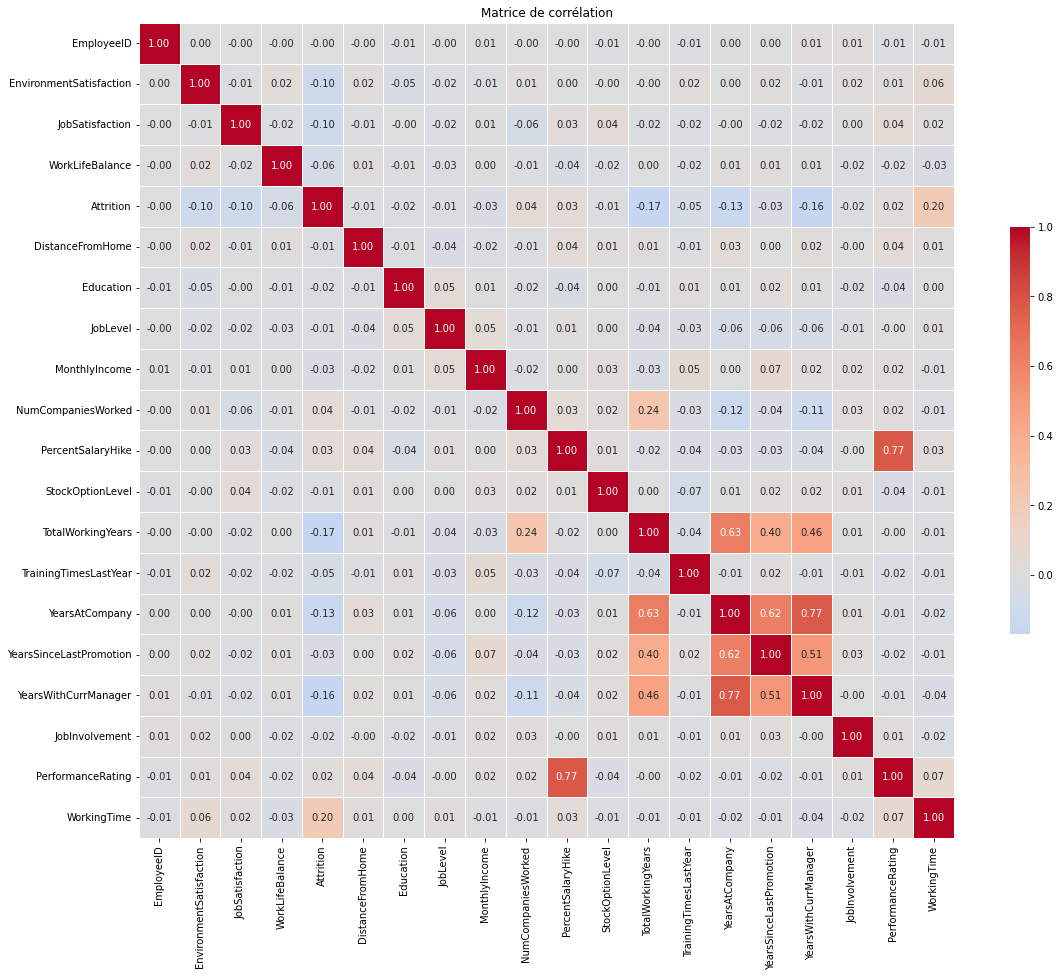

In [69]:
import seaborn as sns
# Calculer et afficher la matrice de corrélation des features
corr_matrix = data_merged.corr()
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="coolwarm", center=0, square=True, cbar_kws={"shrink": .5},ax=ax)
ax.set_title("Matrice de corrélation")
bottom, top = ax.get_ylim()


In [70]:
from sklearn.model_selection import StratifiedShuffleSplit

# Diviser les données en train et test
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data_merged, data_merged['Attrition']):
    train_set = data_merged.loc[train_index]
    test_set = data_merged.loc[test_index]

In [71]:
data_num = train_set.select_dtypes(include=[np.number])
num_attribs = list(data_num)
 
cat_attribs = ["MaritalStatus", "JobRole", "Department"]
bin_attribs = ["BusinessTravel","EducationField"]

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
        ('bin_attribs', OrdinalEncoder(), bin_attribs)
])
 
data_prepared = full_pipeline.fit_transform(data_merged) 
data_prepared = pd.DataFrame(data_prepared)

train_X = full_pipeline.fit_transform(train_set)
test_X = full_pipeline.transform(test_set)
train_y = train_set['Attrition']
test_y = test_set['Attrition']


In [ ]:
data_prepared.shape

(4410, 37)

In [ ]:
data_merged.shape

(4410, 25)